In [1]:
import numpy as np
import gymnasium as gym

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import cv2

In [2]:
# Discrete action space for cart racing environment
env = gym.make('CarRacing-v2', continuous=False)
# Prints out observation space of the environment
print("Observation space: ", env.observation_space)
# Prints out the action space of the environment
print("Action space: ", env.action_space)

Observation space:  Box(0, 255, (96, 96, 3), uint8)
Action space:  Discrete(5)


In [29]:
[item for item in dir(env.action_space) if "__" not in item]

['_is_protocol',
 '_np_random',
 '_shape',
 'contains',
 'dtype',
 'from_jsonable',
 'is_np_flattenable',
 'n',
 'np_random',
 'sample',
 'seed',
 'shape',
 'start',
 'to_jsonable']

In [9]:
env.action_space.sample()

0

(96, 96, 3)


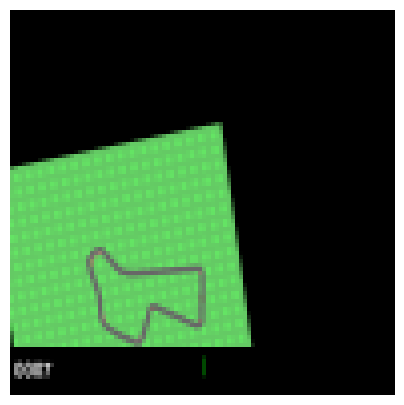

In [10]:
s, info = env.reset(seed=42)
print(s.shape)

plt.figure(figsize=(5, 5))
plt.imshow(s)
plt.axis('off')
plt.show()

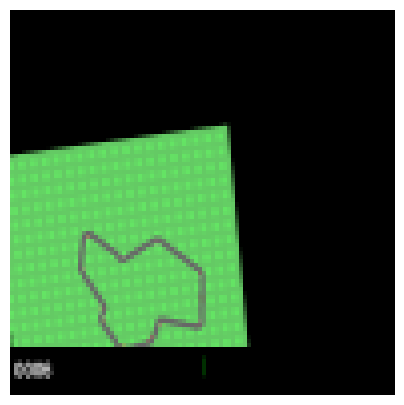

In [14]:
s, info = env.reset()

plt.figure(figsize=(5, 5))
plt.imshow(s)
plt.axis('off')
plt.show()

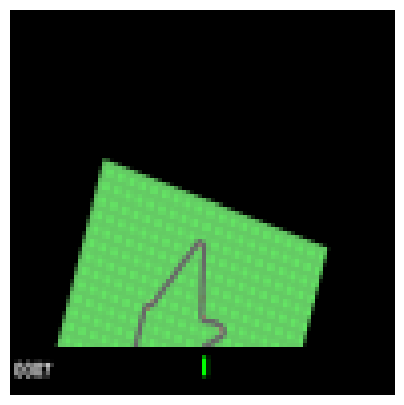

In [16]:
s, info = env.reset(seed=42)

plt.figure(figsize=(5, 5))
plt.imshow(s)
plt.axis('off')
plt.show()

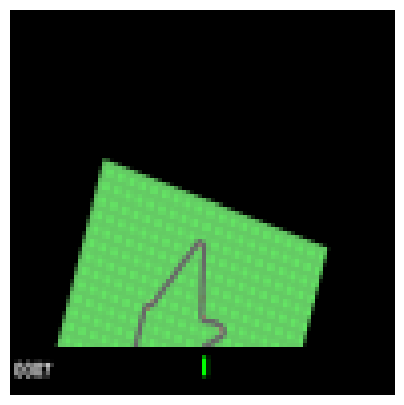

In [17]:
s, info = env.reset(seed=42)

plt.figure(figsize=(5, 5))
plt.imshow(s)
plt.axis('off')
plt.show()

/home/ymarca/anaconda3/envs/rl-carracing/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


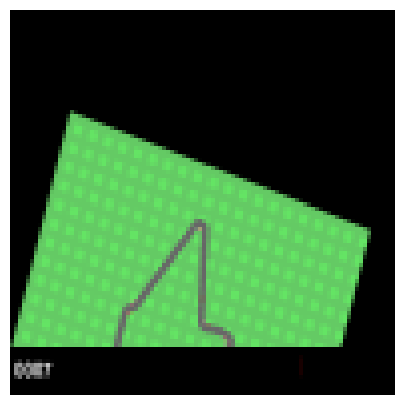

In [19]:
frames = []
for i in range(50):
    s, r, terminated, truncated, info = env.step(0)  # 0-th action is no_op action
    frames.append(s)

# Create animation
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
im = plt.imshow(frames[0])
def animate(i):
    im.set_array(frames[i])
    return im,
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames))
HTML(anim.to_jshtml())

In [22]:
observation, reward, terminated, truncated, info = env.step(0)
print(info, reward, terminated, truncated)

{} -0.10000000000000009 False False


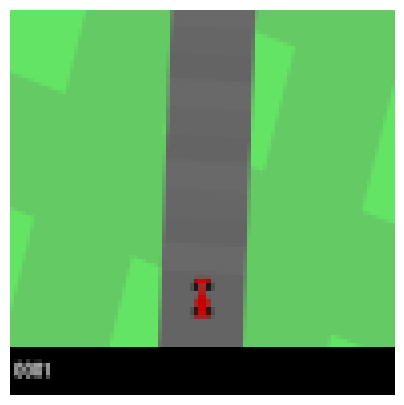

In [23]:
plt.figure(figsize=(5, 5))
plt.imshow(observation)
plt.axis('off')
plt.show()

In [26]:
import cv2

def preprocess(img):
    img = img[:84, 6:90] # CarRacing-v2-specific cropping
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255.0
    return img


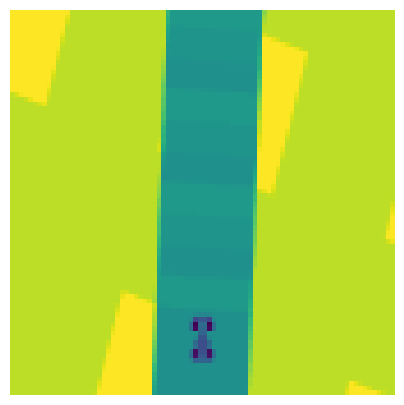

In [27]:
plt.figure(figsize=(5, 5))
plt.imshow(preprocess(observation))
plt.axis('off')
plt.show()

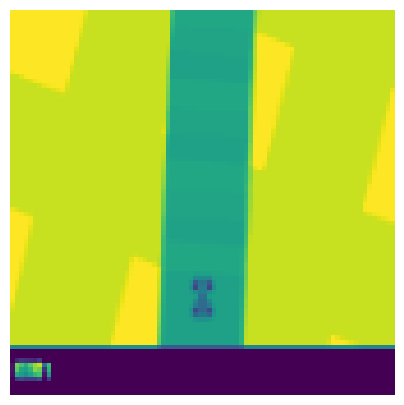

In [28]:
def preprocess(img):
    img = cv2.resize(img, dsize=(84, 84)) # or you can simply use rescaling
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255.0
    return img

plt.figure(figsize=(5, 5))
plt.imshow(preprocess(observation))
plt.axis('off')
plt.show()

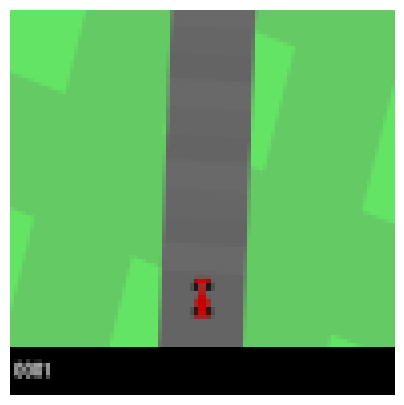

In [30]:
frames = []
for i in range(50):
    s, r, terminated, truncated, info = env.step(env.action_space.sample())
    frames.append(s)

# Create animation
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
im = plt.imshow(frames[0])
def animate(i):
    im.set_array(frames[i])
    return im,
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames))
HTML(anim.to_jshtml())

In [35]:
[i for i in range(20)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [36]:
[i%2 for i in range(20)]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [37]:
np.unique([i%2 for i in range(20)])

array([0, 1])

In [38]:
np.unique([i%3 for i in range(20)])

array([0, 1, 2])

In [41]:
[i for i in range(20) if i%5 == 0]

[0, 5, 10, 15]

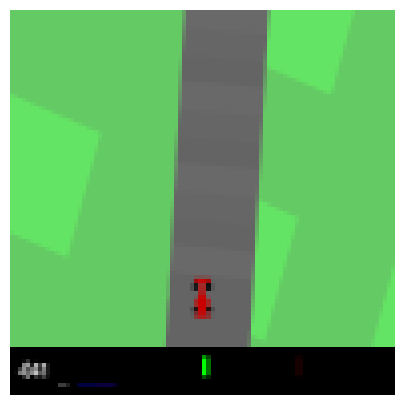

In [45]:
frames = []
for i in range(200):
    s, r, terminated, truncated, info = env.step(env.action_space.sample())
    frames.append(s)

frames = np.array(frames)
filter = [True if i%5 == 0 else False for i in range(200)]

frames = frames[filter]

# Create animation
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
im = plt.imshow(frames[0])
def animate(i):
    im.set_array(frames[i])
    return im,
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames))
HTML(anim.to_jshtml())

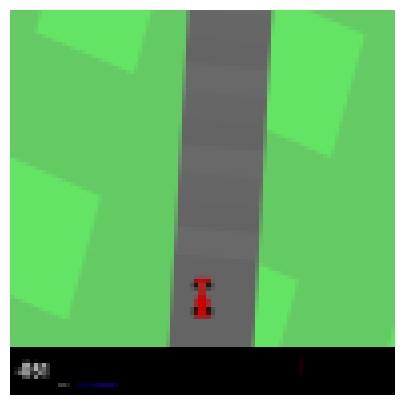

In [46]:
frames = []
for i in range(200):
    s, r, terminated, truncated, info = env.step(3)
    frames.append(s)

frames = np.array(frames)
filter = [True if i%5 == 0 else False for i in range(200)]

frames = frames[filter]

# Create animation
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
im = plt.imshow(frames[0])
def animate(i):
    im.set_array(frames[i])
    return im,
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames))
HTML(anim.to_jshtml())

In [47]:
class ImageEnv(gym.Wrapper):
    def __init__(
        self,
        env,
        skip_frames=4,
        stack_frames=4,
        initial_no_op=50,
        **kwargs
    ):
        super(ImageEnv, self).__init__(env, **kwargs)
        self.initial_no_op = initial_no_op
        self.skip_frames = skip_frames
        self.stack_frames = stack_frames
    
    def reset(self):
        # Reset the original environment.
        s, info = self.env.reset()

        # Do nothing for the next `self.initial_no_op` steps
        for i in range(self.initial_no_op):
            s, r, terminated, truncated, info = self.env.step(0)
        
        # Convert a frame to 84 X 84 gray scale one
        s = self.preprocess(s)

        # The initial observation is simply a copy of the frame `s`
        self.stacked_state = torch.tile(s, (self.stack_frames, 1, 1)).unsqueeze(0)  # [1, 4, 84, 84]
        return self.stacked_state, info
    
    def step(self, action):
        # We take an action for self.skip_frames steps
        reward = 0
        for _ in range(self.skip_frames):
            s, r, terminated, truncated, info = self.env.step(action)
            reward += r
            if terminated or truncated:
                break

        # Convert a frame to 84 X 84 gray scale one
        s = self.preprocess(s)

        # Push the current frame `s` at the end of self.stacked_state
        self.stacked_state = torch.cat((self.stacked_state[:, 1:], s.unsqueeze(0).unsqueeze(0)), dim=1)

        return self.stacked_state, reward, terminated, truncated, info
    
    def preprocess(self, frame):
        # Convert the frame to grayscale and resize to 84x84 using torchvision.transforms
        from torchvision import transforms
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Grayscale(),
            transforms.Resize((84, 84)),
            transforms.ToTensor()
        ])
        frame = transform(frame)
        return frame


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNActionValue(nn.Module):
    def __init__(self, state_dim, action_dim, activation=F.relu):
        super(CNNActionValue, self).__init__()
        self.conv1 = nn.Conv2d(state_dim, 16, kernel_size=8, stride=4)  # [N, 4, 84, 84] -> [N, 16, 20, 20]
        self.conv2 = nn.Conv2d(16, 32, kernel_size=4, stride=2)  # [N, 16, 20, 20] -> [N, 32, 9, 9]
        self.in_features = 32 * 9 * 9
        self.fc1 = nn.Linear(self.in_features, 256)
        self.fc2 = nn.Linear(256, action_dim)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = x.view((-1, self.in_features))
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


In [49]:
import torch

class ReplayBuffer:
    def __init__(self, state_dim, action_dim, max_size=int(1e5)):
        self.s = torch.zeros((max_size, *state_dim), dtype=torch.float32, device='cuda')
        self.a = torch.zeros((max_size, *action_dim), dtype=torch.int64, device='cuda')
        self.r = torch.zeros((max_size, 1), dtype=torch.float32, device='cuda')
        self.s_prime = torch.zeros((max_size, *state_dim), dtype=torch.float32, device='cuda')
        self.terminated = torch.zeros((max_size, 1), dtype=torch.float32, device='cuda')

        self.ptr = 0
        self.size = 0
        self.max_size = max_size

    def update(self, s, a, r, s_prime, terminated):
        self.s[self.ptr] = torch.tensor(s, dtype=torch.float32, device='cuda')
        self.a[self.ptr] = torch.tensor(a, dtype=torch.int64, device='cuda')
        self.r[self.ptr] = torch.tensor(r, dtype=torch.float32, device='cuda')
        self.s_prime[self.ptr] = torch.tensor(s_prime, dtype=torch.float32, device='cuda')
        self.terminated[self.ptr] = torch.tensor(terminated, dtype=torch.float32, device='cuda')
        
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)
        
    def sample(self, batch_size):
        ind = torch.randint(0, self.size, (batch_size,), device='cuda')
        return (
            self.s[ind],
            self.a[ind],
            self.r[ind],
            self.s_prime[ind],
            self.terminated[ind], 
        )


In [50]:
import torch
import torch.nn.functional as F

class DQN:
    def __init__(
        self,
        state_dim,
        action_dim,
        lr=0.00025,
        epsilon=1.0,
        epsilon_min=0.1,
        gamma=0.99,
        batch_size=32,
        warmup_steps=5000,
        buffer_size=int(1e5),
        target_update_interval=10000,
    ):
        self.action_dim = action_dim
        self.epsilon = epsilon
        self.gamma = gamma
        self.batch_size = batch_size
        self.warmup_steps = warmup_steps
        self.target_update_interval = target_update_interval

        self.network = CNNActionValue(state_dim[0], action_dim)
        self.target_network = CNNActionValue(state_dim[0], action_dim)
        self.target_network.load_state_dict(self.network.state_dict())
        self.optimizer = torch.optim.RMSprop(self.network.parameters(), lr)

        self.buffer = ReplayBuffer(state_dim, (1,), buffer_size)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.network.to(self.device)
        self.target_network.to(self.device)
        
        self.total_steps = 0
        self.epsilon_decay = (epsilon - epsilon_min) / 1e6
    
    @torch.no_grad()
    def act(self, x, training=True):
        self.network.train(training)
        if training and ((np.random.rand() < self.epsilon) or (self.total_steps < self.warmup_steps)):
            a = np.random.randint(0, self.action_dim)
        else:
            x = torch.from_numpy(x).float().unsqueeze(0).to(self.device)
            q = self.network(x)
            a = torch.argmax(q).item()
        return a
    
    def learn(self):
        s, a, r, s_prime, terminated = map(lambda x: x.to(self.device), self.buffer.sample(self.batch_size))
        
        next_q = self.target_network(s_prime).detach()
        td_target = r + (1. - terminated) * self.gamma * next_q.max(dim=1, keepdim=True).values
        loss = F.mse_loss(self.network(s).gather(1, a.long()), td_target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        result = {
            'total_steps': self.total_steps,
            'value_loss': loss.item()
        }
        return result
    
    def process(self, transition):
        result = {}
        self.total_steps += 1
        self.buffer.update(*transition)

        if self.total_steps > self.warmup_steps:
            result = self.learn()
            
        if self.total_steps % self.target_update_interval == 0:
            self.target_network.load_state_dict(self.network.state_dict())
        self.epsilon -= self.epsilon_decay
        return result


In [51]:
# Initialize the CarRacing environment with discrete action space
env = gym.make('CarRacing-v2', continuous=False)
env = ImageEnv(env)

# Set the maximum steps and evaluation interval
max_steps = int(2e6)
eval_interval = 10000

# Define state and action dimensions
state_dim = (4, 84, 84)
action_dim = env.action_space.n

# Initialize the DQN agent
agent = DQN(state_dim, action_dim)

# Main training loop
total_rewards = []
for step in range(1, max_steps + 1):
    state, _ = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = agent.act(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        agent.process((state, action, reward, next_state, terminated))
        state = next_state
        total_reward += reward

        if step % eval_interval == 0:
            eval_reward = evaluate_agent(env, agent)
            print(f"Step: {step}, Evaluation Reward: {eval_reward}")

    total_rewards.append(total_reward)

# Function to evaluate the agent's performance
def evaluate_agent(env, agent, episodes=5):
    total_eval_reward = 0
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        eval_reward = 0
        while not done:
            action = agent.act(state, training=False)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            state = next_state
            eval_reward += reward
        total_eval_reward += eval_reward
    return total_eval_reward / episodes


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx